# Chi Square

Chi-Square test is used for categorical features in a dataset. We calculate Chi-Square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population.

In [1]:
# Laod libraries

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

iris_dataset = load_iris()

In [2]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
x = iris_dataset.data
y = iris_dataset.target


In [8]:
x =  pd.DataFrame(x, columns = iris_dataset.feature_names)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
x = x. astype(int)

In [10]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5,3,1,0
1,4,3,1,0
2,4,3,1,0
3,4,3,1,0
4,5,3,1,0
...,...,...,...,...
145,6,3,5,2
146,6,2,5,1
147,6,3,5,2
148,6,3,5,2


In [11]:
chi2_features = SelectKBest(chi2, k = 2)
x_kbest_features = chi2_features.fit_transform(x, y)

In [12]:
x_kbest_features

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [3, 1],
       [4, 1],
       [3, 1],
       [3, 1],
       [4, 1],
       [4, 1],
       [4, 1],
       [3, 1],
       [4, 1],
       [4,

In [21]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Load the Iris dataset
iris_dataset = load_iris()
x = iris_dataset.data
y = iris_dataset.target

# Perform feature selection
k = 2  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
x_kbest_features = selector.fit_transform(x, y)

# Print the shapes
X_shape = x.shape
print('Original feature number:', X_shape[1])
print('Reduced feature number:', x_kbest_features.shape[1])


Original feature number: 4
Reduced feature number: 2


# Correlation Coefficient


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


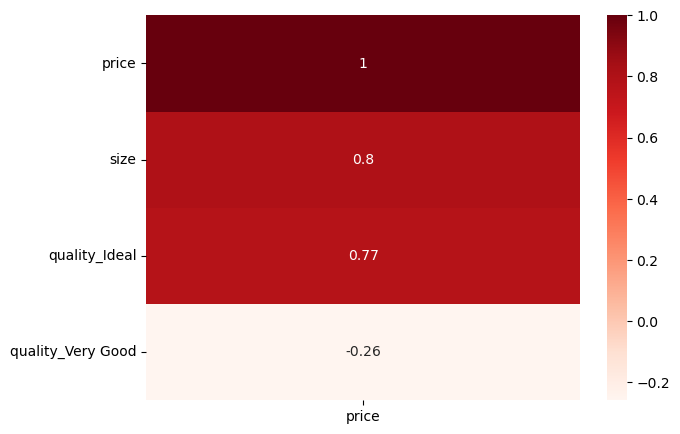

In [30]:
data = {
    'price': [100, 150, 200, 250],
    'quality': ['Good', 'Very Good', 'Good', 'Ideal'],
    'size': [50, 60, 55, 65]
}
df = pd.DataFrame(data)

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Convert non-numeric columns to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Calculate correlation matrix with the target 'price'
target_correlation = df_encoded.corr()[['price']]

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()


In [29]:
target_correlation[abs(target_correlation)>0.5].dropna()

,price
price,1.000000
size,0.800000
quality_Ideal,0.774597
